# Anime Recommendation System

This notebook demonstrates the steps for data preprocessing, exploratory data analysis (EDA), and feature engineering to create an anime recommendation system.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity

# Load the dataset
anime = pd.read_csv('Dataset/anime.csv')

# Display the first few rows of the dataset
anime.head()

,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered,...,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,...,229170.0,182126.0,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,Movie,1,"Sep 1, 2001",Unknown,...,30043.0,49201.0,49505.0,22632.0,5805.0,1877.0,577.0,221.0,109.0,379.0
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,トライガン,TV,26,"Apr 1, 1998 to Sep 30, 1998",Spring 1998,...,50229.0,75651.0,86142.0,49432.0,15376.0,5838.0,1965.0,664.0,316.0,533.0
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),TV,26,"Jul 2, 2002 to Dec 24, 2002",Summer 2002,...,2182.0,4806.0,10128.0,11618.0,5709.0,2920.0,1083.0,353.0,164.0,131.0
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,冒険王ビィト,TV,52,"Sep 30, 2004 to Sep 29, 2005",Fall 2004,...,312.0,529.0,1242.0,1713.0,1068.0,634.0,265.0,83.0,50.0,27.0


## Data Preprocessing

In [2]:
# Check for missing values
anime.isnull().sum()

MAL_ID           0
Name             0
Score            0
Genres           0
English name     0
Japanese name    0
Type             0
Episodes         0
Aired            0
Premiered        0
Producers        0
Licensors        0
Studios          0
Source           0
Duration         0
Rating           0
Ranked           0
Popularity       0
Members          0
Favorites        0
Watching         0
Completed        0
On-Hold          0
Dropped          0
Plan to Watch    0
Score-10         0
Score-9          0
Score-8          0
Score-7          0
Score-6          0
Score-5          0
Score-4          0
Score-3          0
Score-2          0
Score-1          0
dtype: int64

In [3]:
# Fill missing values
anime['English name'].fillna(anime['Japanese name'], inplace=True)
anime['Producers'].fillna('Unknown', inplace=True)
anime['Licensors'].fillna('Unknown', inplace=True)
anime['Studios'].fillna('Unknown', inplace=True)
anime['Premiered'].fillna('Unknown', inplace=True)
anime['Source'].fillna('Unknown', inplace=True)
anime['Duration'].fillna('Unknown', inplace=True)
anime['Rating'].fillna('Unknown', inplace=True)

# Drop rows with missing 'Score' values
anime.dropna(subset=['Score'], inplace=True)

# Convert 'Score' to numeric
anime['Score'] = pd.to_numeric(anime['Score'], errors='coerce')

C:\Users\TTripathi\AppData\Local\Temp\ipykernel_10268\3551489457.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  anime['English name'].fillna(anime['Japanese name'], inplace=True)
C:\Users\TTripathi\AppData\Local\Temp\ipykernel_10268\3551489457.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always b

## Exploratory Data Analysis (EDA)

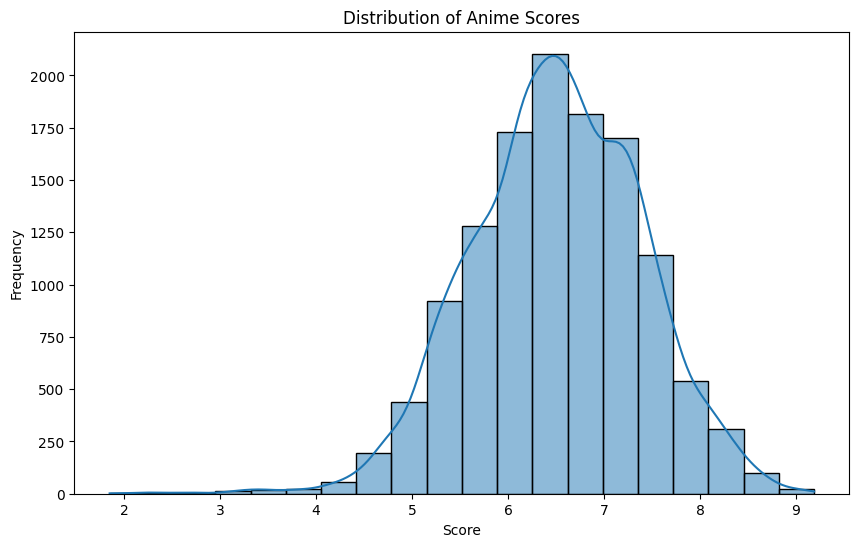

In [4]:
# Distribution of Scores
plt.figure(figsize=(10, 6))
sns.histplot(anime['Score'], bins=20, kde=True)
plt.title('Distribution of Anime Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

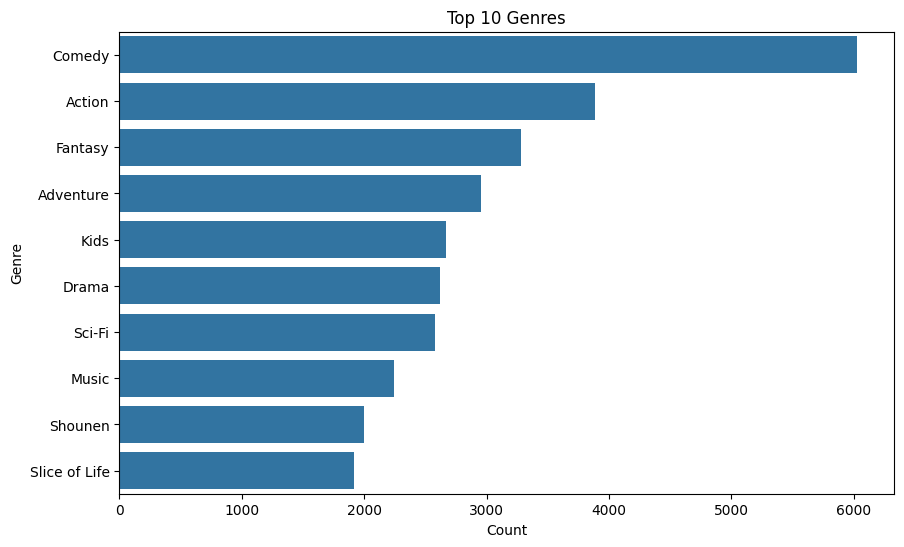

In [5]:
# Top 10 Genres
top_genres = anime['Genres'].str.split(', ', expand=True).stack().value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_genres.values, y=top_genres.index)
plt.title('Top 10 Genres')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

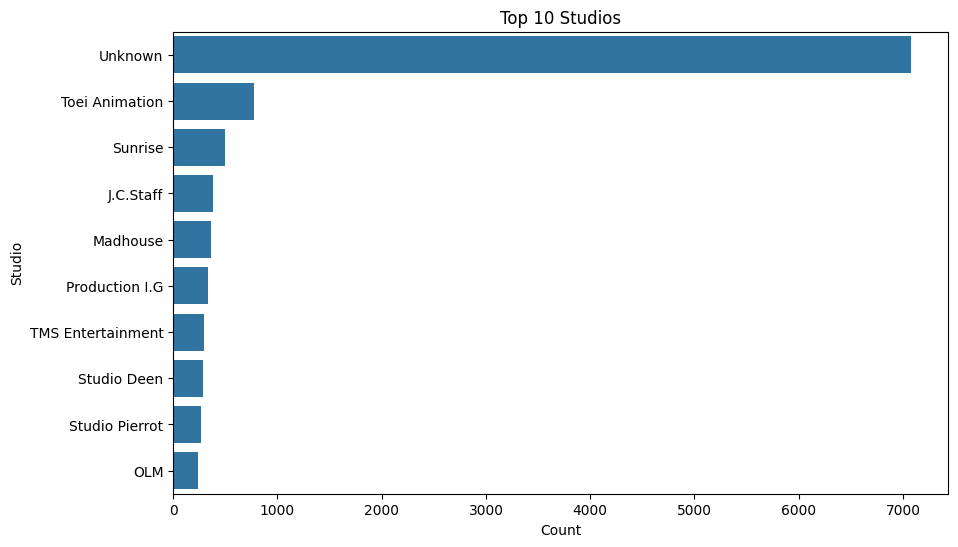

In [6]:
# Top 10 Studios
top_studios = anime['Studios'].str.split(', ', expand=True).stack().value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_studios.values, y=top_studios.index)
plt.title('Top 10 Studios')
plt.xlabel('Count')
plt.ylabel('Studio')
plt.show()

## Feature Engineering

In [7]:
# Convert 'Genres' to dummy variables
genres_dummies = anime['Genres'].str.get_dummies(sep=', ')

# Convert 'Type' to dummy variables
type_dummies = pd.get_dummies(anime['Type'], prefix='Type')

# Convert 'Rating' to dummy variables
rating_dummies = pd.get_dummies(anime['Rating'], prefix='Rating')

# Combine all features
anime_features = pd.concat([anime[['MAL_ID', 'Score']], genres_dummies, type_dummies, rating_dummies], axis=1)

# Normalize the features
scaler = MinMaxScaler()
anime_features_scaled = scaler.fit_transform(anime_features.drop('MAL_ID', axis=1))

# Create a DataFrame with the scaled features
anime_features_scaled_df = pd.DataFrame(anime_features_scaled, columns=anime_features.columns[1:])

# Add the 'MAL_ID' column back
anime_features_scaled_df['MAL_ID'] = anime_features['MAL_ID']

# Save the preprocessed data
anime_features_scaled_df.to_csv('Dataset/anime_features_scaled.csv', index=False)

## Recommendation System

In [9]:
# Fill NaN values with 0
anime_features_scaled_df.fillna(0, inplace=True)

# Compute the cosine similarity matrix
cosine_sim = cosine_similarity(anime_features_scaled_df.drop('MAL_ID', axis=1))

# Function to get recommendations
def get_recommendations(anime_id, cosine_sim=cosine_sim):
    idx = anime_features_scaled_df[anime_features_scaled_df['MAL_ID'] == anime_id].index[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    anime_indices = [i[0] for i in sim_scores]
    return anime.iloc[anime_indices][['MAL_ID', 'Name', 'Score']]

# Example: Get recommendations for 'Cowboy Bebop'
get_recommendations(1)

,MAL_ID,Name,Score
3454,4037,Cowboy Bebop: Yose Atsume Blues,7.44
771,854,Soul Link,6.13
1118,1226,Seihou Tenshi Angel Links,5.96
11685,33051,Mobile Suit Gundam: Iron-Blooded Orphans 2nd S...,8.24
10880,31251,Mobile Suit Gundam: Iron-Blooded Orphans,8.02
376,400,Seihou Bukyou Outlaw Star,7.87
10946,31433,Ginga Eiyuu Densetsu: Die Neue These - Kaikou,7.70
3905,4981,Casshern Sins,7.53
2016,2203,Waga Seishun no Arcadia: Mugen Kidou SSX,7.40
1352,1490,Ginga Tetsudou Monogatari,7.16
